In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # For displaying a progress bar
import cv2 # Import OpenCV

In [8]:
# Define paths to data directory
data_dir = "../input/drowsiness-detection/"

In [10]:
# Load all data
all_data_gen = ImageDataGenerator(rescale=1./255)
all_data = all_data_gen.flow_from_directory(data_dir, target_size=(24, 24), batch_size=1, shuffle=True, color_mode='grayscale', class_mode='categorical')

# Split data into training, validation, and test sets (60%, 20%, 20%)
X, y = [], []
for _ in tqdm(range(len(all_data))):
    img, label = next(all_data)  # Use next() function to get the next batch
    X.append(img[0])
    y.append(label[0])

X = np.array(X)
y = np.array(y)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32, shuffle=True)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=32, shuffle=True)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32, shuffle=False)


Found 48000 images belonging to 2 classes.


100%|██████████████████████████████████████████████████████████████████████████| 48000/48000 [00:08<00:00, 5564.34it/s]


In [11]:
# Updated CNN Model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

C:\Users\mdari\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Model summary
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 22, 22, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 22, 22, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 9, 9, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127,106 (496.51 KB)

 Trainable params: 126,658 (494.76 KB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
# Train the model
history = cnn_model.fit(
    train_generator, 
    validation_data=validation_generator, 
    epochs=10, 
    steps_per_epoch=10000, 
    verbose=1
)

Epoch 1/10


C:\Users\mdari\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  899/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9149 - loss: 0.2130

C:\Users\mdari\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 443us/step - accuracy: 0.9439 - loss: 0.1494 - val_accuracy: 0.5203 - val_loss: 9.6949
Epoch 2/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 428us/step - accuracy: 0.9753 - loss: 0.0711 - val_accuracy: 0.5096 - val_loss: 2.1002
Epoch 3/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 429us/step - accuracy: 0.9811 - loss: 0.0563 - val_accuracy: 0.7328 - val_loss: 0.6602
Epoch 4/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 499us/step - accuracy: 0.9814 - loss: 0.0516 - val_accuracy: 0.5789 - val_loss: 3.8404
Epoch 5/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 642us/step - accuracy: 0.9820 - loss: 0.0528 - val_accuracy: 0.7125 - val_loss: 0.6119
Epoch 6/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 813us/step - accuracy: 0.9868 - loss: 0.0386 - val_accuracy: 0.8856 - val_loss: 0.2992
Epoch 7/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 705us/step - accuracy: 0.9875 - loss: 0.0378 - val_accuracy: 0.9688 - val_loss: 0.1012
Epoch 8/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 680us/step - accuracy: 0.9

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy}")


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9710 - loss: 0.1019
Test Accuracy: 0.9710416793823242


In [20]:
# Save the model
os.makedirs('models', exist_ok=True)
cnn_model.save('models_1/eyes.h5', overwrite=True)

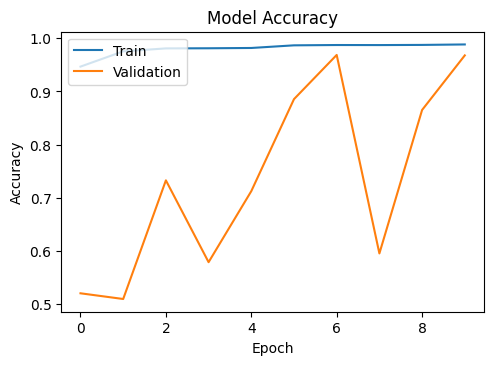

In [16]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

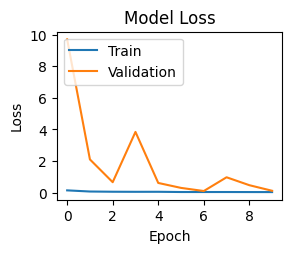

In [17]:
# Plot training & validation loss values
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


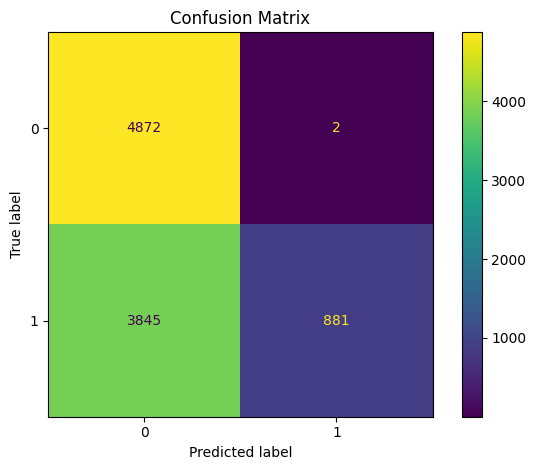

In [18]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()